Nama Kelompok:  1. Adam F R - 3c - 2213020132
                2. Eka Andy Y - 3c - 2213020134
                3. M Ghufton - 3c - 2213020136 

#### Percobaan dan Latihan

Langkah 1 : mengimport library diantaranya pandas dan numpy

In [26]:
import pandas as pd
import numpy as np

Langkah 2 : Membaca dataset menggunakan fungsi read_csv() untuk membaca file CSV dan mengonversinya menjadi DataFrame

In [27]:
ds = pd.read_csv('data_laliga.csv')
ds.head(10)

,HomeTeam,AwayTeam,HS,AS,HST,AST,HF,AF,HC,AC,HY,AY,HR,AR,HTHG,HTAG,FTR
0,Ath Bilbao,Getafe,7,9,4,2,15,12,5,6,4,1,0,0,1,0,D
1,Betis,Girona,19,13,4,2,11,7,4,4,2,0,0,0,1,0,D
2,Celta,Alaves,6,10,4,2,8,23,3,3,3,2,0,0,0,1,H
3,Las Palmas,Sevilla,13,16,5,5,12,13,6,3,0,0,0,0,1,1,D
4,Osasuna,Leganes,16,10,5,4,14,12,6,4,3,2,0,0,0,1,D
5,Valencia,Barcelona,6,18,1,8,11,13,3,8,2,3,0,0,1,1,A
6,Sociedad,Vallecano,11,12,5,5,14,21,10,5,2,4,0,0,0,0,A
7,Mallorca,Real Madrid,12,13,5,4,11,6,8,7,1,0,0,1,0,1,D
8,Valladolid,Espanol,12,10,3,2,15,8,3,2,2,2,0,0,1,0,H
9,Villarreal,Ath Madrid,8,10,3,5,6,10,2,3,1,3,0,0,2,2,D


In [28]:
ds.shape

(1520, 17)

In [29]:
ds.isnull().sum()

HomeTeam    0
AwayTeam    0
HS          0
AS          0
HST         0
AST         0
HF          0
AF          0
HC          0
AC          0
HY          0
AY          0
HR          0
AR          0
HTHG        0
HTAG        0
FTR         0
dtype: int64

In [30]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1520 entries, 0 to 1519
Data columns (total 17 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   HomeTeam  1520 non-null   object
 1   AwayTeam  1520 non-null   object
 2   HS        1520 non-null   int64 
 3   AS        1520 non-null   int64 
 4   HST       1520 non-null   int64 
 5   AST       1520 non-null   int64 
 6   HF        1520 non-null   int64 
 7   AF        1520 non-null   int64 
 8   HC        1520 non-null   int64 
 9   AC        1520 non-null   int64 
 10  HY        1520 non-null   int64 
 11  AY        1520 non-null   int64 
 12  HR        1520 non-null   int64 
 13  AR        1520 non-null   int64 
 14  HTHG      1520 non-null   int64 
 15  HTAG      1520 non-null   int64 
 16  FTR       1520 non-null   object
dtypes: int64(14), object(3)
memory usage: 202.0+ KB


Langkah 3 : Praprosesing 

Pada kolom HomeTeam, AwayTeam, dan FTR yang bertipe data string diubah menjadi integer. Proses encoding yang digunakan yaitu Label Encoding supaya nilai pada kolom berurutan. 

In [31]:
from sklearn.preprocessing import LabelEncoder
le_home = LabelEncoder()
le_away = LabelEncoder()
le_ftr = LabelEncoder()

ds['HomeTeam'] = le_home.fit_transform(ds['HomeTeam'])
ds['AwayTeam'] = le_away.fit_transform(ds['AwayTeam'])
ds['FTR'] = le_ftr.fit_transform(ds['FTR'])

# Melihat mapping
print("HomeTeam classes:", list(le_home.classes_))
print("AwayTeam classes:", list(le_away.classes_))
print("FTR classes:", list(le_ftr.classes_))


HomeTeam classes: ['Alaves', 'Almeria', 'Ath Bilbao', 'Ath Madrid', 'Barcelona', 'Betis', 'Cadiz', 'Celta', 'Elche', 'Espanol', 'Getafe', 'Girona', 'Granada', 'Las Palmas', 'Leganes', 'Levante', 'Mallorca', 'Osasuna', 'Real Madrid', 'Sevilla', 'Sociedad', 'Valencia', 'Valladolid', 'Vallecano', 'Villarreal']
AwayTeam classes: ['Alaves', 'Almeria', 'Ath Bilbao', 'Ath Madrid', 'Barcelona', 'Betis', 'Cadiz', 'Celta', 'Elche', 'Espanol', 'Getafe', 'Girona', 'Granada', 'Las Palmas', 'Leganes', 'Levante', 'Mallorca', 'Osasuna', 'Real Madrid', 'Sevilla', 'Sociedad', 'Valencia', 'Valladolid', 'Vallecano', 'Villarreal']
FTR classes: ['A', 'D', 'H']


menyimpan label encander

In [32]:
import joblib

joblib.dump(le_home, 'le_home.pkl')
joblib.dump(le_away, 'le_away.pkl')
joblib.dump(le_ftr, 'le_ftr.pkl')

print("LabelEncoder berhasil disimpan.")


LabelEncoder berhasil disimpan.


In [33]:
ds.head(10)

,HomeTeam,AwayTeam,HS,AS,HST,AST,HF,AF,HC,AC,HY,AY,HR,AR,HTHG,HTAG,FTR
0,2,10,7,9,4,2,15,12,5,6,4,1,0,0,1,0,1
1,5,11,19,13,4,2,11,7,4,4,2,0,0,0,1,0,1
2,7,0,6,10,4,2,8,23,3,3,3,2,0,0,0,1,2
3,13,19,13,16,5,5,12,13,6,3,0,0,0,0,1,1,1
4,17,14,16,10,5,4,14,12,6,4,3,2,0,0,0,1,1
5,21,4,6,18,1,8,11,13,3,8,2,3,0,0,1,1,0
6,20,23,11,12,5,5,14,21,10,5,2,4,0,0,0,0,0
7,16,18,12,13,5,4,11,6,8,7,1,0,0,1,0,1,1
8,22,9,12,10,3,2,15,8,3,2,2,2,0,0,1,0,2
9,24,3,8,10,3,5,6,10,2,3,1,3,0,0,2,2,1


Data terlebih dahulu dipisah menjadi atribut dan label, Atribut ditandai dengan huruf X, label ditandai dengan huruf Y. Atribut yang digunakan yaitu HomeTeam, AwayTeam, HS, AS, HST, AST, HC, AC, HF, AF, HY, AY, HR, AR, HTHG, HTAG.Sedangkan label yang digunakan yaitu FTR. 

In [34]:
x = ds[ds.columns[0:16]]
y = ds['FTR']

In [35]:
x

,HomeTeam,AwayTeam,HS,AS,HST,AST,HF,AF,HC,AC,HY,AY,HR,AR,HTHG,HTAG
0,2,10,7,9,4,2,15,12,5,6,4,1,0,0,1,0
1,5,11,19,13,4,2,11,7,4,4,2,0,0,0,1,0
2,7,0,6,10,4,2,8,23,3,3,3,2,0,0,0,1
3,13,19,13,16,5,5,12,13,6,3,0,0,0,0,1,1
4,17,14,16,10,5,4,14,12,6,4,3,2,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1515,12,9,15,10,5,5,9,12,7,3,1,0,0,0,0,0
1516,17,16,11,14,1,6,8,14,5,7,2,2,0,0,0,0
1517,4,24,14,4,3,3,12,7,12,1,3,1,0,0,0,1
1518,19,2,13,9,3,1,13,12,5,0,3,3,0,0,0,0


Kemudian Dataset dibagi menjadi data training (data latih) sebesar 80% dan data testing (data uji) 
sebesar 20% dari 1520 data yang digunakan, pembagian data dilakukan dengan Train Test Split 

In [36]:
# membagi dataset menjadi trening dan testing
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.2, random_state=1)

In [37]:
print(x_test.shape)

(304, 16)


Langkah 4 : Pemodelan

Pada pengujian menggunakan algoritma AdaBoost, data train dimasukkan ke dalam model, parameter yang ditambahkan yaitu learning_rate sebesar 0,20. Kemudian dilakukan prediksi 

In [38]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier

abSpain = AdaBoostClassifier(random_state=10, learning_rate=0.20)
abSpain.fit(x_train, y_train)
abSpain_pred = abSpain.predict(x_test)

print(abSpain_pred) #hasil prediksi
print(y_test) #jawaban sebenarnya
print(accuracy_score(y_test, abSpain_pred)*100)
print(f"Akurasi: {accuracy_score(y_test, abSpain_pred) * 100:.2f}%")

[2 1 2 1 0 0 2 2 2 2 2 2 2 2 1 2 2 0 2 2 0 0 2 2 2 0 2 0 2 0 2 2 2 2 2 2 2
 0 2 1 0 2 1 2 0 2 0 0 2 0 2 2 2 2 2 0 2 0 2 0 2 0 2 2 2 2 1 0 2 2 2 0 2 2
 2 1 0 0 2 0 2 2 2 2 0 2 2 0 2 2 2 2 2 2 2 0 0 0 0 2 2 1 2 2 0 0 2 2 2 2 0
 2 0 2 2 2 2 2 1 2 2 2 1 2 0 0 2 0 2 2 2 0 0 2 0 1 2 2 2 2 2 0 0 2 2 1 0 0
 2 0 2 2 2 0 2 2 2 2 2 0 2 2 0 1 0 1 0 2 0 2 2 2 2 1 0 2 2 1 2 2 0 1 2 2 2
 0 2 2 1 2 0 1 2 1 2 2 2 2 0 0 0 2 2 2 1 2 0 2 2 2 1 0 2 2 2 2 2 0 2 2 1 2
 2 2 1 2 1 1 1 2 2 0 2 2 2 0 2 2 2 0 1 2 2 2 0 2 2 2 2 2 2 2 2 1 2 0 2 2 2
 2 0 2 2 2 2 2 2 1 2 2 0 0 1 2 0 0 1 0 2 2 0 1 2 0 2 0 2 0 2 2 1 2 1 2 2 0
 2 1 2 2 2 0 2 2]
1472    2
368     0
1152    1
1029    1
1324    1
       ..
81      2
563     2
386     0
1153    1
1091    1
Name: FTR, Length: 304, dtype: int64
59.210526315789465
Akurasi: 59.21%


In [39]:
print("Model parameters:", abSpain.get_params())

Model parameters: {'algorithm': 'deprecated', 'estimator': None, 'learning_rate': 0.2, 'n_estimators': 50, 'random_state': 10}


In [40]:
print(x_test.head())

      HomeTeam  AwayTeam  HS  AS  HST  AST  HF  AF  HC  AC  HY  AY  HR  AR  \
1472        18         9  11  20    5    6  11   6   6   8   2   0   0   0   
368         21         2   6  10    2    4  10  16   5   3   3   1   0   0   
1152         9        24  14  12    3    2  10  10   9   7   3   4   0   0   
1029        21        23  18   7    4    2  15  16  13   3   2   3   0   0   
1324         8        12  18  10    2    5  18  15   6   3   3   3   1   0   

      HTHG  HTAG  
1472     2     0  
368      0     0  
1152     0     0  
1029     0     1  
1324     0     0  


In [41]:
print(x.columns)

Index(['HomeTeam', 'AwayTeam', 'HS', 'AS', 'HST', 'AST', 'HF', 'AF', 'HC',
       'AC', 'HY', 'AY', 'HR', 'AR', 'HTHG', 'HTAG'],
      dtype='object')


menyimpan model

In [42]:
import joblib

joblib.dump(abSpain, 'model_adaboost.pkl')
print("Model berhasil disimpan ke 'model_adaboost.pkl'")


Model berhasil disimpan ke 'model_adaboost.pkl'


Langkah 5 :Evaluasi Model

In [43]:
from sklearn.metrics import classification_report
print(classification_report(y_test, abSpain_pred))


              precision    recall  f1-score   support

           0       0.60      0.58      0.59        79
           1       0.36      0.15      0.21        88
           2       0.63      0.88      0.74       137

    accuracy                           0.59       304
   macro avg       0.53      0.54      0.51       304
weighted avg       0.55      0.59      0.55       304



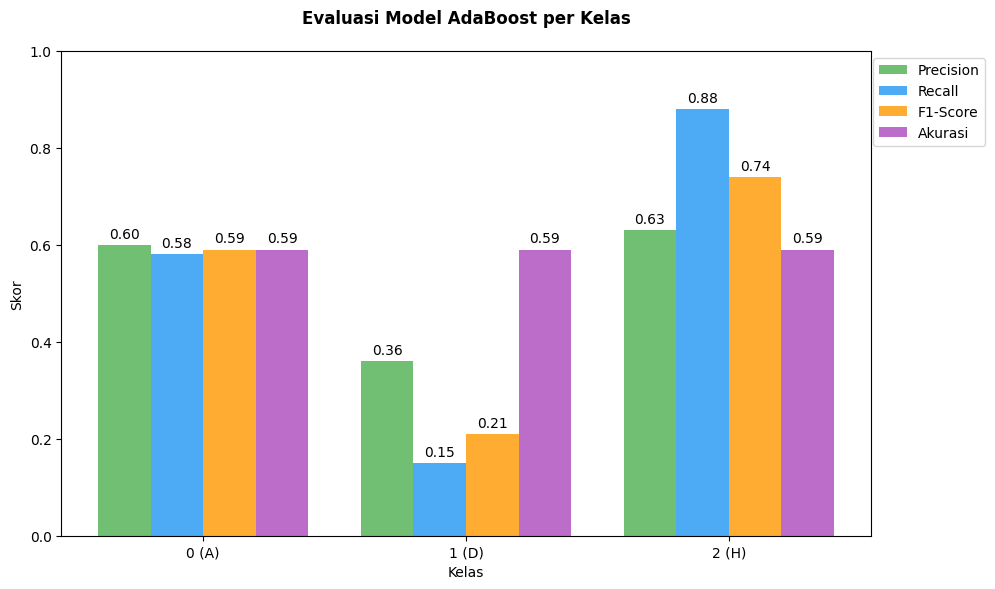

In [44]:
import matplotlib.pyplot as plt
import numpy as np

# Nilai metrik evaluasi per kelas
precision = [0.60, 0.36, 0.63]
recall = [0.58, 0.15, 0.88]
f1 = [0.59, 0.21, 0.74]
# Akurasi total model (ditampilkan sama untuk tiap kelas demi visualisasi)
akurasi_total = 0.59
akurasi = [akurasi_total] * 3  # Menyamakan panjang list agar bisa diplot per kelas

classes = ['0 (A)', '1 (D)', '2 (H)']

# Plot
fig, ax = plt.subplots(figsize=(10, 6))
bar_width = 0.2
index = np.arange(len(classes))

# Plot masing-masing metrik
bar1 = ax.bar(index, precision, bar_width, label='Precision', color='#4CAF50', alpha=0.8)
bar2 = ax.bar(index + bar_width, recall, bar_width, label='Recall', color='#2196F3', alpha=0.8)
bar3 = ax.bar(index + 2 * bar_width, f1, bar_width, label='F1-Score', color='#FF9800', alpha=0.8)
bar4 = ax.bar(index + 3 * bar_width, akurasi, bar_width, label='Akurasi', color='#ab47bc', alpha=0.8)

# Label dan tampilan
ax.set_xlabel('Kelas')
ax.set_ylabel('Skor')
ax.set_title('Evaluasi Model AdaBoost per Kelas', pad=20, fontweight='bold')
ax.set_xticks(index + 1.5 * bar_width)
ax.set_xticklabels(classes)
ax.set_ylim(0, 1.0)
ax.legend(loc='upper right', bbox_to_anchor=(1.15, 1))

# Menampilkan nilai di atas bar
for bars in [bar1, bar2, bar3, bar4]:
    for bar in bars:
        height = bar.get_height()
        ax.annotate(f'{height:.2f}',
                    xy=(bar.get_x() + bar.get_width() / 2, height),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom')

plt.tight_layout()
plt.show()
